In [74]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



In [31]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()
df.isnull().sum()

VIN (1-10)                                             0
County                                                 1
City                                                   1
State                                                  0
Postal Code                                            1
Model Year                                             0
Make                                                   0
Model                                                  7
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 276
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                     428
2020 Census Tract                                      1
dtype: int64

In [32]:
df = df.drop(['Electric Utility', 'Legislative District'], axis=1)
df.dropna(inplace=True)

In [36]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,2020 Census Tract,veh_loc_x,veh_loc_y
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,200589147,POINT (-104.89239 39.61914),8.005007e+09,-104.89239,39.61914
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,326880081,POINT (-122.575569 48.08489),5.302997e+10,-122.575569,48.08489
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,182237457,POINT (-119.78637 36.30101),6.031980e+09,-119.78637,36.30101
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,320914072,POINT (-122.300531 37.869271),6.001423e+09,-122.300531,37.869271
5,5YJSA1E23L,El Paso,Colorado Springs,CO,80925.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330,0,148640635,POINT (-104.63826 38.74006),8.041005e+09,-104.63826,38.74006


In [34]:
df['veh_loc_x'] = ''
df['veh_loc_y'] = ''


In [35]:
for i in range(df.shape[0]):
    s = df.iloc[i,13]
    df.iloc[i, 15] = float(s[7:-1].split(' ')[0])
    df.iloc[i, 16] = float(s[7:-1].split(' ')[1])


In [37]:
df = df[df['State'] == 'WA']

In [55]:
len(df.index[df['veh_loc_x'] == 114.32466])

351

In [62]:
# Visualization of data
x = df[df['County'] == 'King'].iloc[:, 15]
y = df[df['County'] == 'King'].iloc[:, 16]
# print(min(x), min(y), max(x), max(y))
for i in df['County'].unique():
    print(i, len(df[df['County'] == i]))

Island 1281
Chelan 635
Snohomish 12021
Thurston 4034
King 57393
Skagit 1240
Kitsap 3772
Walla Walla 301
Yakima 601
Grant 322
Whitman 170
Spokane 2719
Clark 6453
Pacific 141
Jefferson 681
Whatcom 2767
Pierce 8214
Lewis 435
Mason 538
San Juan 712
Pend Oreille 31
Benton 1329
Clallam 711
Grays Harbor 391
Douglas 219
Klickitat 167
Okanogan 148
Adams 35
Cowlitz 566
Skamania 134
Ferry 27
Franklin 353
Asotin 45
Stevens 140
Kittitas 384
Wahkiakum 37
Columbia 13
Lincoln 28
Garfield 4


In [82]:
# Clustering Part only on King County

# Generate some random 2D data
data = df[df['County'] == 'Snohomish'].iloc[:, 15:17]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Predict the clusters for each data point
predictions = kmeans.predict(data)

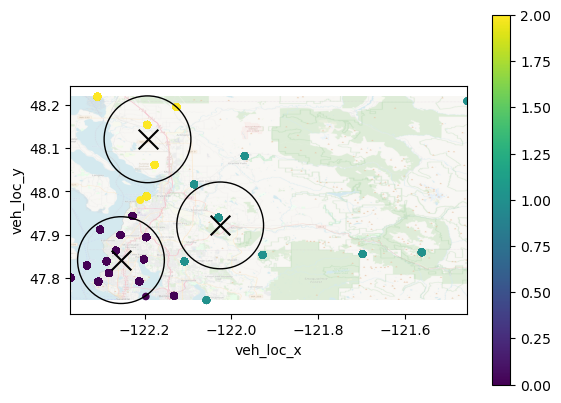

In [88]:

# Extract the coordinates of the cluster centers
centers = kmeans.cluster_centers_
labels = kmeans.labels_

img = mpimg.imread('map (3).png')
ax = data.plot(kind="scatter", x="veh_loc_x", y="veh_loc_y", c=labels, cmap='viridis')
#ax.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.imshow(img, extent=[-122.3710, -121.4564, 47.7490, 48.2180], alpha=0.5)


# Plot the data and the clusters
#plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=predictions)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black')
for center in centers:
    ax.add_patch(plt.Circle(center, 0.1, fc='none', ec='black'))
plt.show()

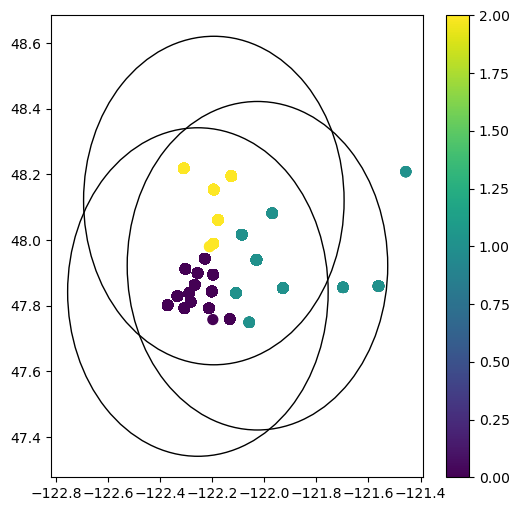

In [91]:
import matplotlib.pyplot as plt

# Extract the coordinates of the cluster centers and the cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the data and the clusters
scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, s=50, cmap='viridis')

# Draw lines around the clusters
for center in centers:
    ax.add_patch(plt.Circle(center, 0.5, fc='none', ec='black'))

# Add a legend and show the plot
plt.colorbar(scatter, ax=ax)
plt.show()

/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


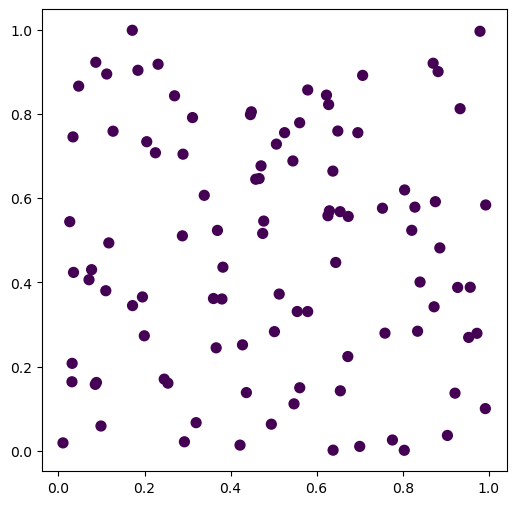

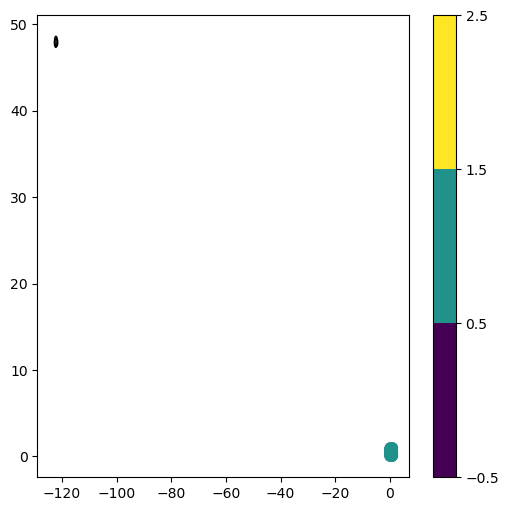

In [97]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate some random 2D data
data = np.random.rand(100, 2)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit the model to the data
dbscan.fit(data)

# Extract the cluster labels
labels = dbscan.labels_

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the data and the clusters
scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

# Extract the coordinates of the cluster centers and the cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.predict(data)

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Create a custom colormap
cmap = plt.cm.get_cmap('viridis', len(centers))
norm = BoundaryNorm(np.arange(len(centers) + 1) - 0.5, len(centers))

# Plot the data and the clusters
scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap=cmap, norm=norm)

# Draw lines around the clusters
for center in centers:
    ax.add_patch(plt.Circle(center, 0.5, fc='none', ec='black'))

# Add a legend and show the plot
plt.colorbar(scatter, ax=ax)
plt.show()